In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
import vice

import surp
from surp.analysis.apogee_analysis import subgiants

import arya

In [4]:
def find_model(name):
    """
    Finds the pickled model with either the given name or the parameters 
    and returns the vice_model object
    """
    
    file_name = "../out/" + name + ".csv"
    return pd.read_csv(file_name, index_col=0)

def translate_label(s):
    return "[" + s.lower().replace("_", "/").replace("mg", "o") + "]"

In [5]:
data_kwargs = dict(
    color="k", 
    stat="median",
    err_kwargs=dict(facecolor="k", alpha=0.3)
)

model_kwargs = dict(
    stat="median", errorbar=None,
    aes="line"
)

def zooh_models(models, labels, y="C_MG", sequential=False, **kwargs):
    kwargs = dict(numbins=20, **kwargs)
    
    N = len(models)
    if sequential:
        hm = arya.figure.colorbar.HueMap(clim=(0, len(models)))
    for i in range(N):
        name = labels[i]
        model = models[i]
        fe_h = -model["[o/fe]"] + model["[o/h]"]
        mg_fe = model["[o/fe]"]
        filt = mg_fe < surp.analysis.mg_fe_cutoff(fe_h)
        
        if sequential:
            color = hm(i)
        else:
            color=None
        arya.medianplot(model[filt], x="[o/h]", y=translate_label(y), label=name, color=color, **model_kwargs, **kwargs)


    df = subgiants[~subgiants.high_alpha]
    
    arya.medianplot(df, x="MG_H", y=y, zorder=-2, **data_kwargs, **kwargs)
    
    
def zofeo_models(models, labels, y="C_MG", sequential=False, mg_0=-0.1, w=0.05, **kwargs):
    kwargs = dict(numbins=12,  **kwargs)

    N = len(models)

    if sequential:
        hm = arya.figure.colorbar.HueMap(clim=(0, len(models)))
    for i in range(N):
        model = models[i]
        filt = model["[o/h]"] > mg_0 - w
        filt &= model["[o/h]"] < mg_0 + w
        df = model[filt].copy()
        if sequential:
            color = hm(i)
        else:
            color=None
        arya.medianplot(df, x="[o/fe]", y=translate_label(y), label=labels[i], color=color, **model_kwargs, **kwargs)
    
    filt = subgiants["MG_H"] > mg_0 - w
    filt &= subgiants["MG_H"] < mg_0 + w
    df = subgiants[filt]

    arya.medianplot(df, x="MG_FE", y=y, **data_kwargs, **kwargs)

In [6]:
def names_to_models(names):
    return [find_model(name) for name in names]

def compare_cooh(names, labels, **kwargs):
    models = names_to_models(names)
    zooh_models(models, labels, **kwargs)
    arya.Legend(color_only=True)
    plt.xlabel("[Mg/H]")
    plt.ylabel("[C/Mg]")
    
    plt.ylim(-0.3, 0.025)
    plt.yticks(np.arange(-0.25, 0.02, 0.05))
    plt.xlim(-0.45, 0.35)
    
    
def compare_coofe(names, labels, legend=True, **kwargs):
    models = names_to_models(names)
    zofeo_models(models, labels, legend=legend, **kwargs)
    if legend:
        arya.Legend(color_only=True)
    plt.xlabel("[Mg/Fe]")
    plt.ylabel("[C/Mg]")


In [7]:
def compare(names, labels, sequential=False):
    fig, axs = plt.subplots(1, 2, figsize=(7, 3), sharex="col", sharey=True,  gridspec_kw={"wspace": 0, "hspace": 0})


    plt.sca(axs[0])
    compare_cooh(names, labels, sequential=sequential)
    arya.Legend(color_only=True)
    plt.sca(axs[1])
    compare_coofe(names, labels, legend=False, sequential=sequential)

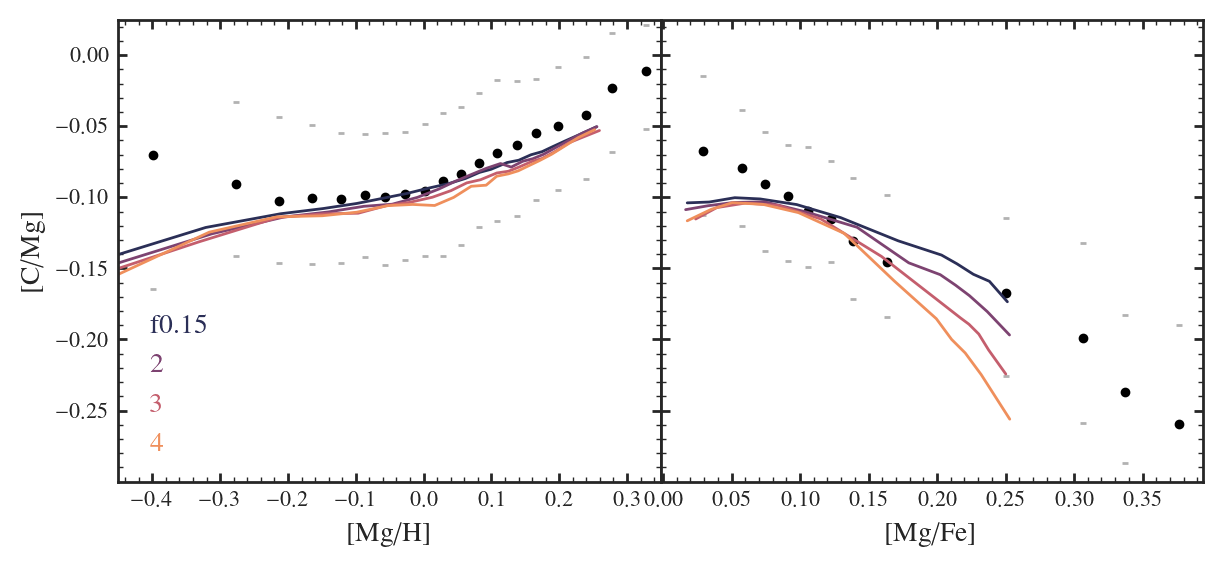

In [8]:
names = [    
"C11_f0.15",
    "C11_f0.2",
    "C11_f0.25",
    "C11_f0.3"
]

labels = ["f0.15", "2", "3", "4", "5"]
compare(names, labels, sequential=True)


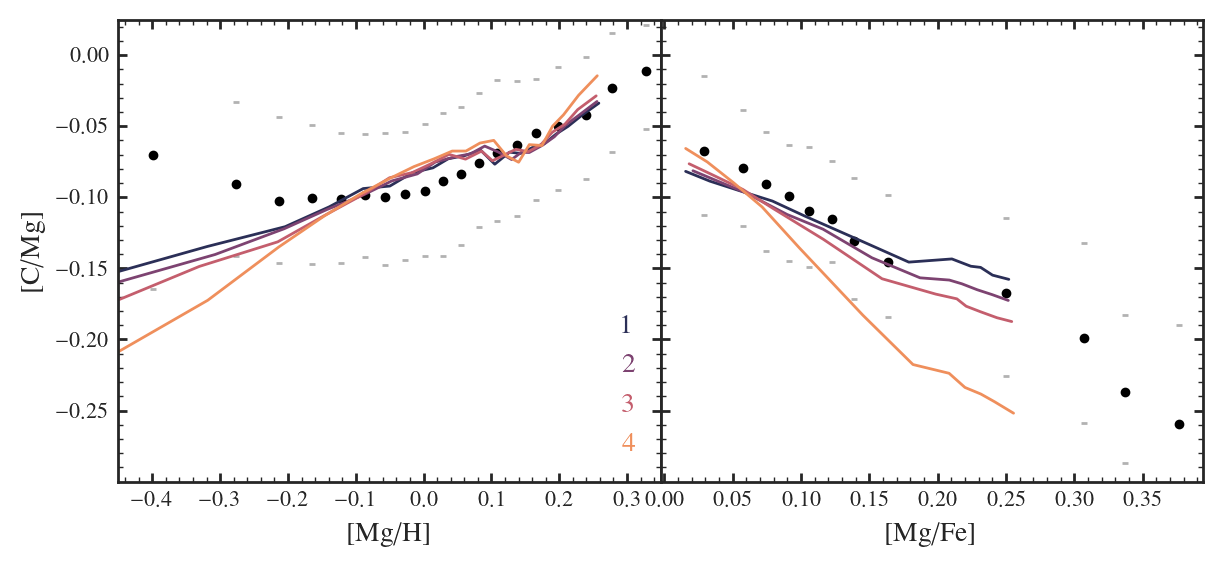

In [9]:
names = [  
    "C11_m1.5_P_f0.08",
    "C11_m1.5_P_f0.1",
    "C11_m1.5_P_f0.12",
    #"C11_m1.5_P_f0.15",
    "C11_m1.5_P_f0.2",
]

labels = ["1", "2", "3", "4", "5"]
compare(names, labels, sequential=True)


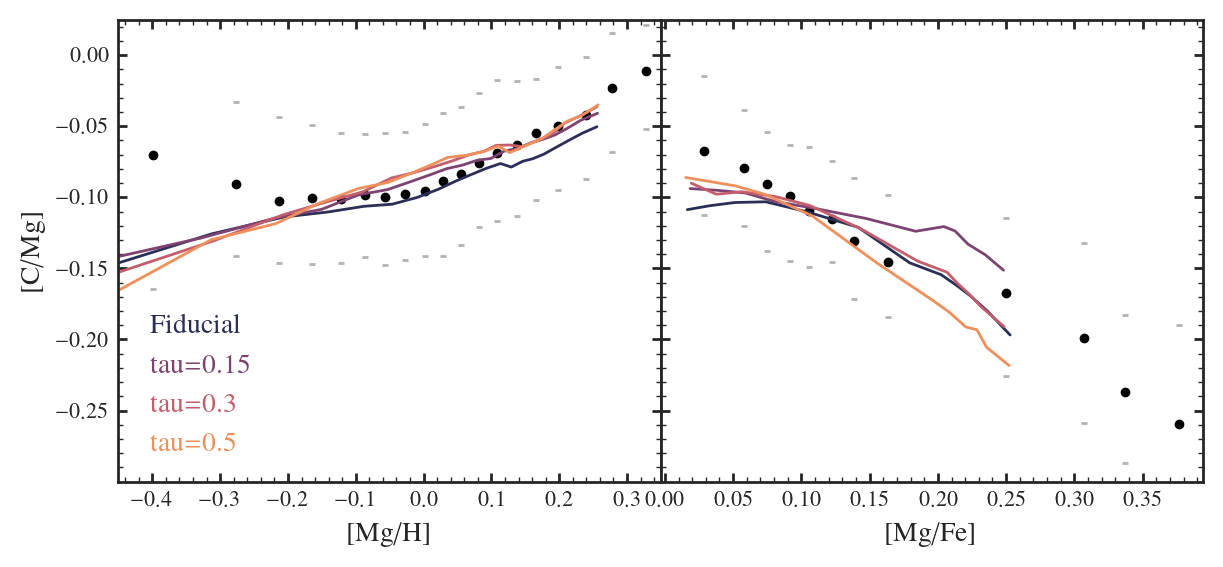

In [10]:
names = [  
    "C11_f0.2",
    "A_tau_a_0.15_f0.2",
"A_f0.2",
"A_tau_a_0.6_f0.2",
]

labels = ["Fiducial", "tau=0.15", "tau=0.3", "tau=0.5", "tau=0.9"]
compare(names, labels, sequential=True)


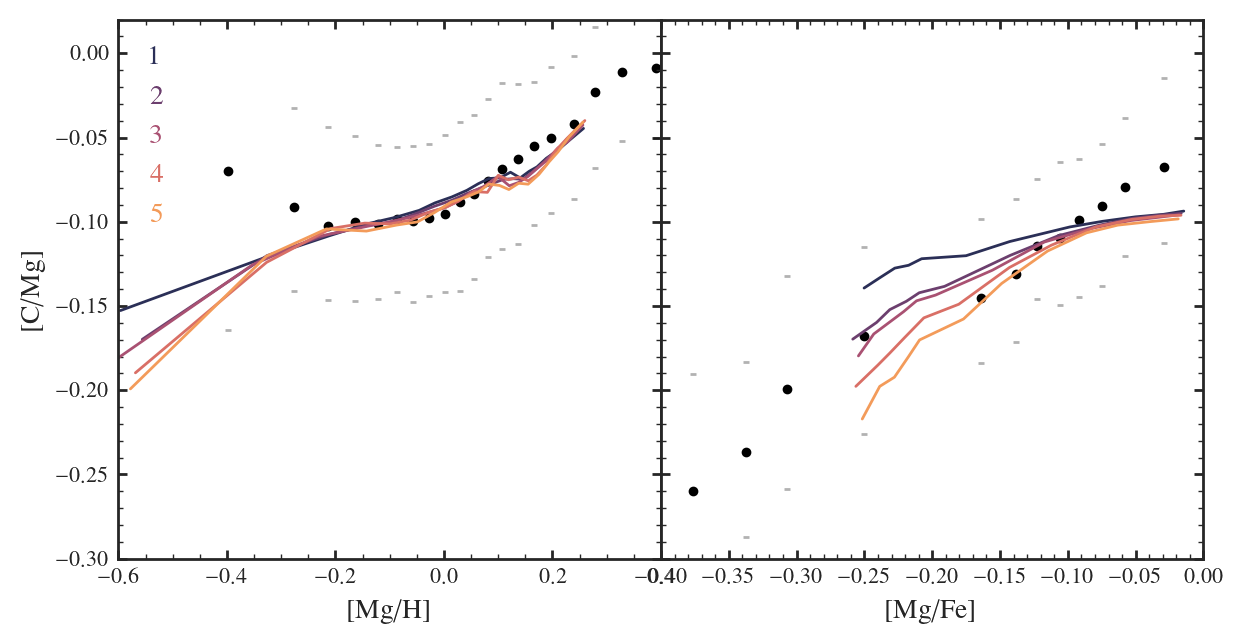

In [33]:
names = [
    "P16_f0.1",
"P16_f0.18",
    "P16_f0.2",
"P16_f0.25",
    "P16_f0.3",
]

labels = ["1", "2", "3", "4", "5"]
compare(names, labels, sequential=True)


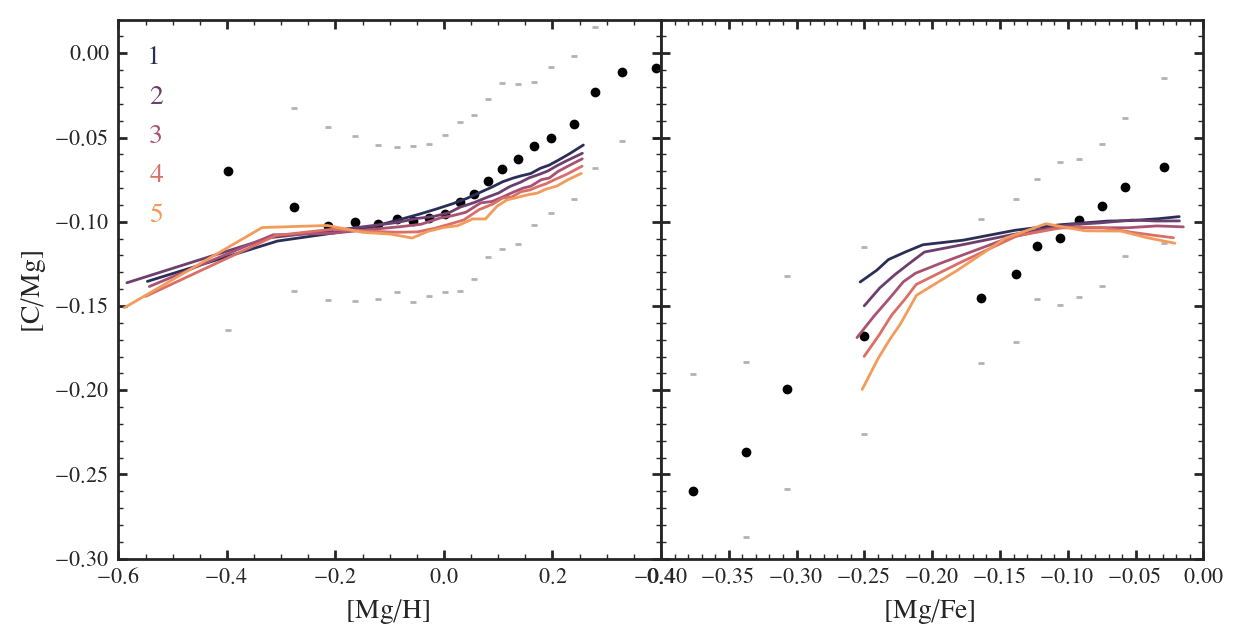

In [27]:
names = [
    "K16_f0.1",
    "K16_f0.15",
    "K16_f0.2",
    "K16_f0.25",
    "K16_f0.3",
]

labels = ["1", "2", "3", "4", "5"]
compare(names, labels, sequential=True)


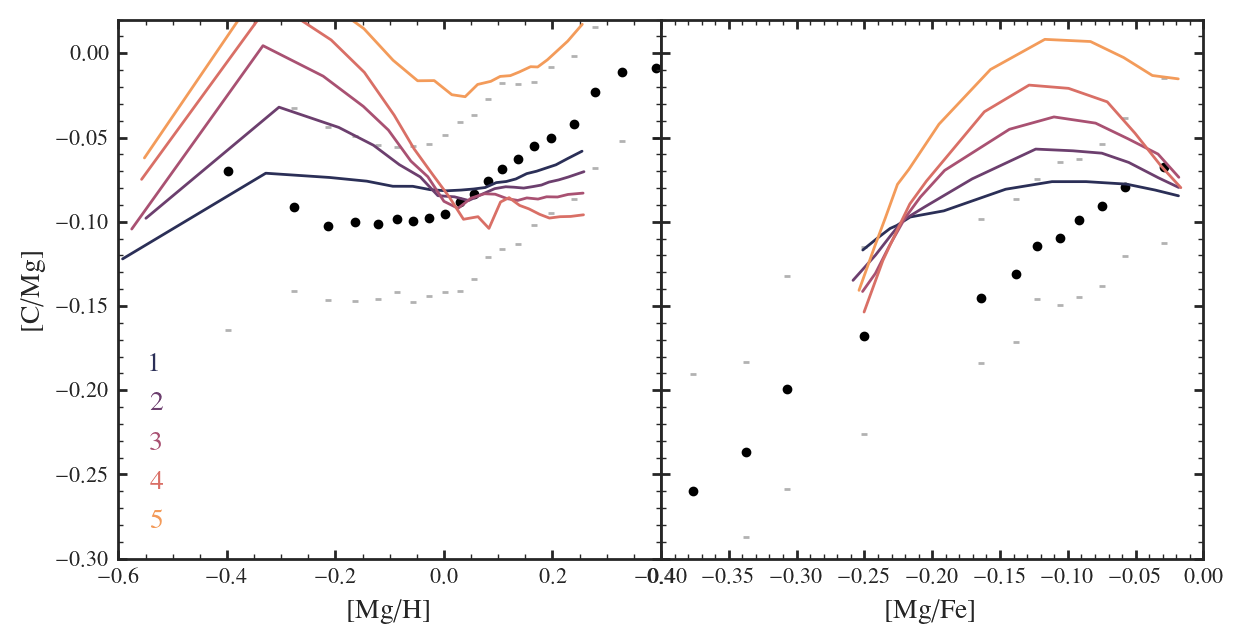

In [32]:
names = [
    "V13_f0.05",
    "V13_f0.1",
"V13_f0.15",
    "V13_f0.2",
        "V13_P_f0.2",
]

labels = ["1", "2", "3", "4", "5"]
compare(names, labels, sequential=True)


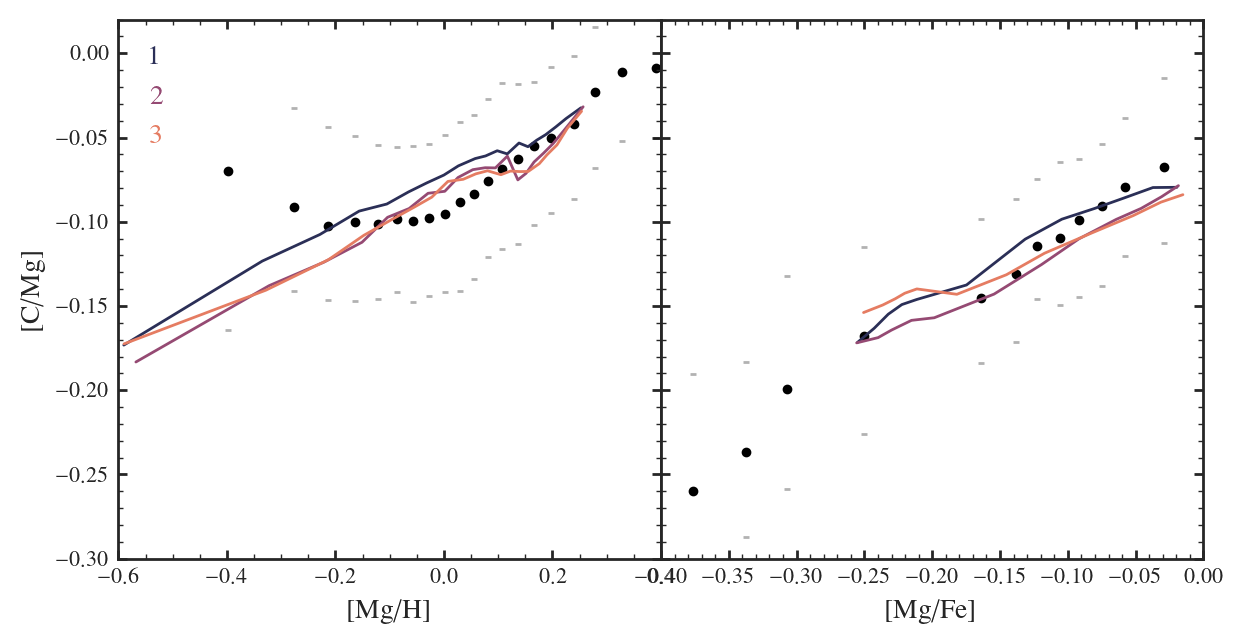

In [29]:
names = [
   "K16_m1.5_P_f0.1",
   "C11_m1.5_P_f0.1",
    "P16_m1.5_P_f0.1",
]

labels = ["1", "2", "3", "4", "5"]
compare(names, labels, sequential=True)


In [ ]:
names = [    
"P16_f0.15",
"P16_f0.2",
    "P16_f0.25",
    "P16_f0.3",
]

labels = ["1", "2", "3", "4", "5"]
compare(names, labels, sequential=True)


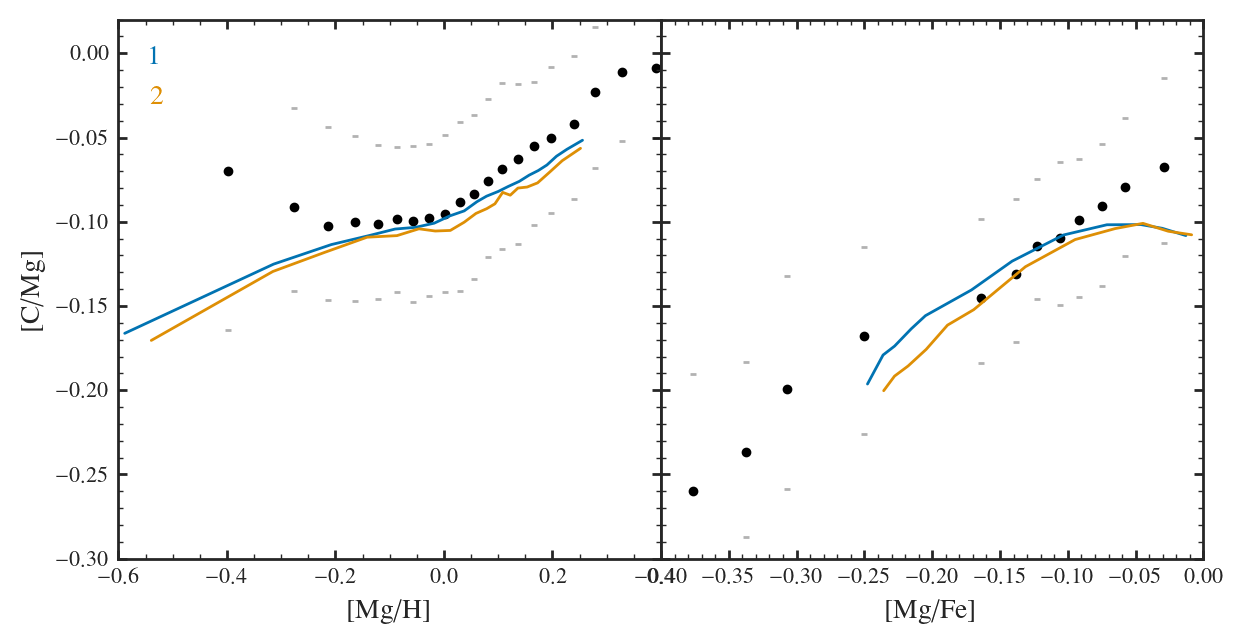

In [9]:
names = [
    "C11_f0.2",
"C11_f0.2_gaussian_dt0.05"
]

labels = ["1", "2", "3", "4", "5"]
compare(names, labels, sequential=False)


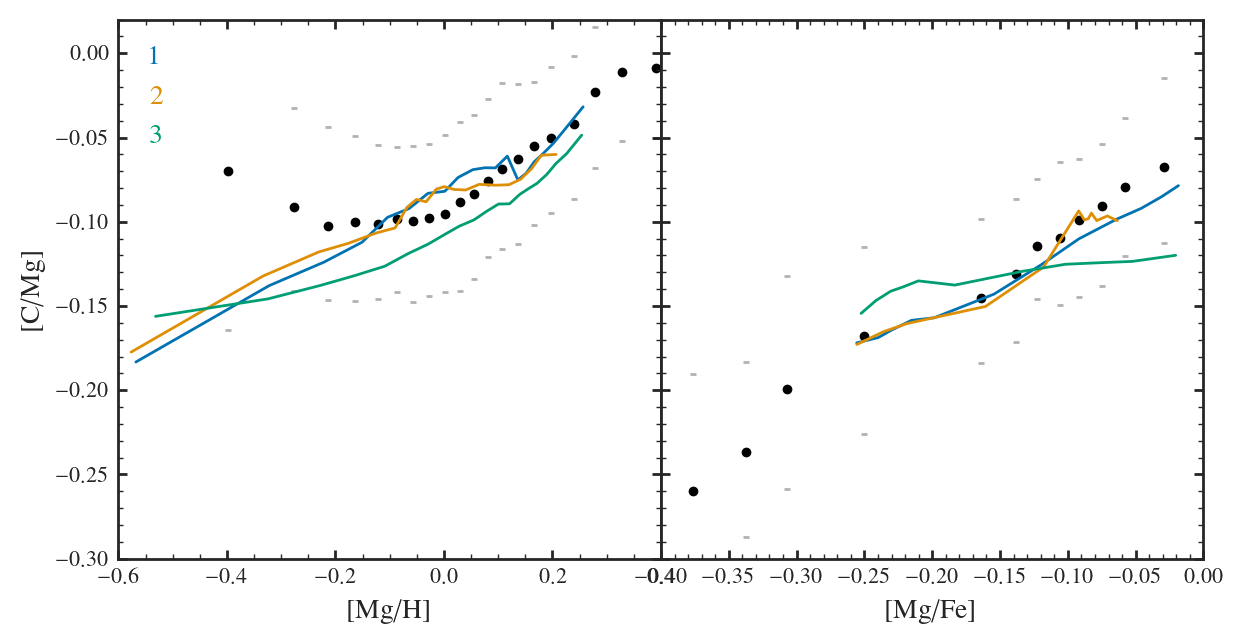

In [34]:
names = [
    "C11_m1.5_P_f0.1",
"C11_m1.5_P_f0.1_lateburst1",
    "C11_m0.6_P_f0.2"
]

labels = ["1", "2", "3", "4", "5"]
compare(names, labels, sequential=False)


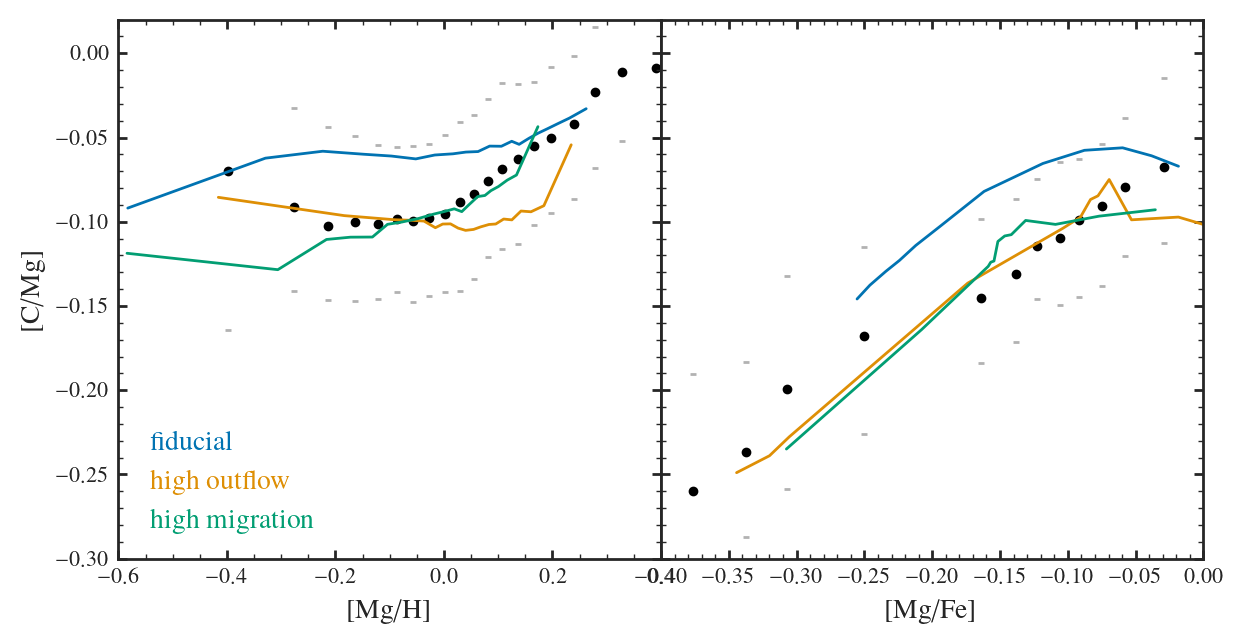

In [15]:
names = [    
"C11_f0.2",

]

labels = ["fiducial", "high outflow", "high migration"]
compare(names, labels)


In [ ]:
names = [    
"C11_f0.2_dt0.05",
]

labels = ["fiducial", "C++sf law"]
compare(names, labels)


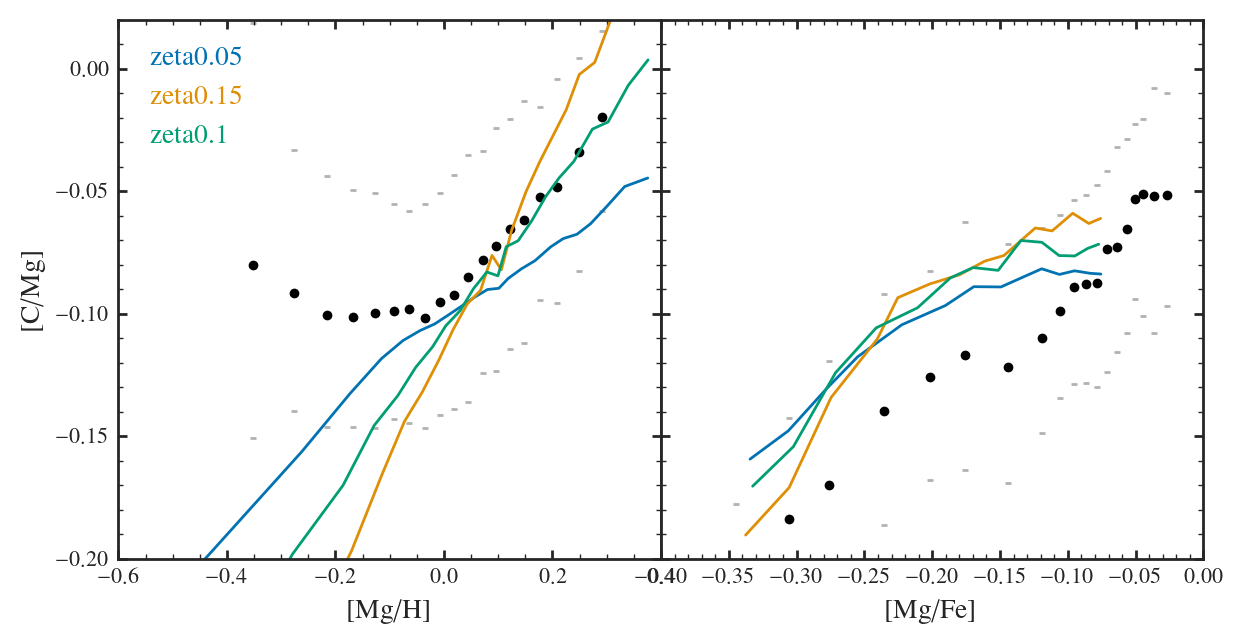

In [11]:
names = [    
"P16_f0.2_zeta0.05",
"P16_f0.2_zeta0.15",
"P16_f0.2_zeta0.1",
  ]

labels = ["zeta0.05", "zeta0.15", "zeta0.1"]
compare(names, labels)

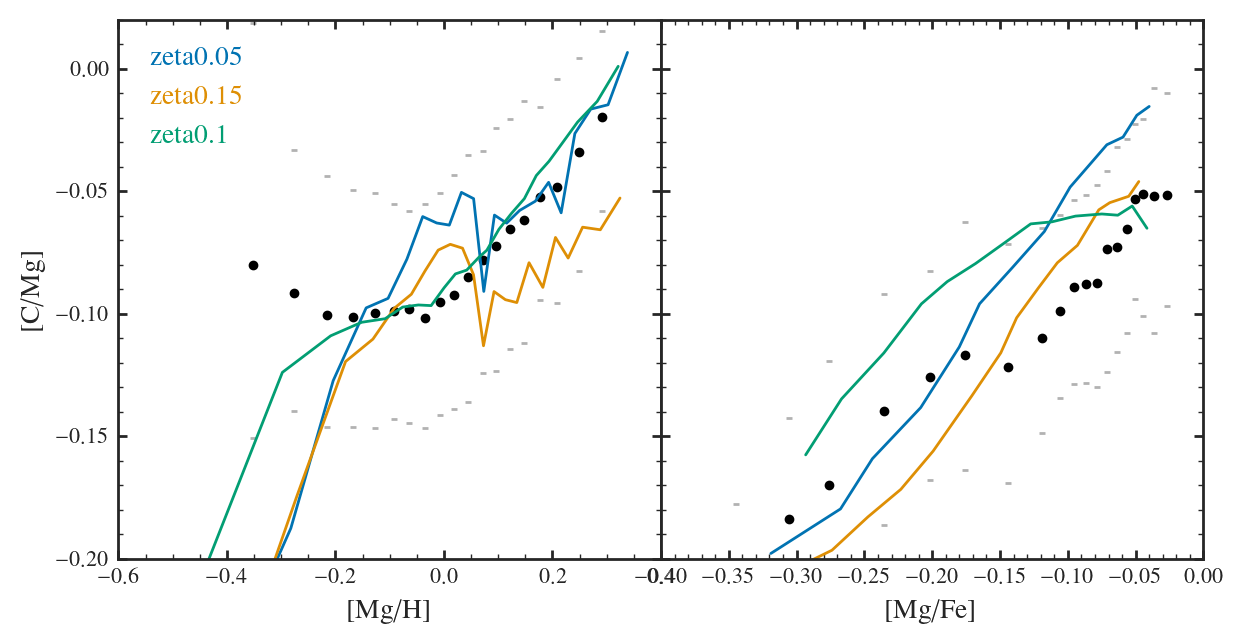

In [15]:
names = [    
"C11_m1.5_P_f0.2",
    "C11_m1.5_f0.2",
    "C11_f0.2",
  ]

labels = ["zeta0.05", "zeta0.15", "zeta0.1"]
compare(names, labels)

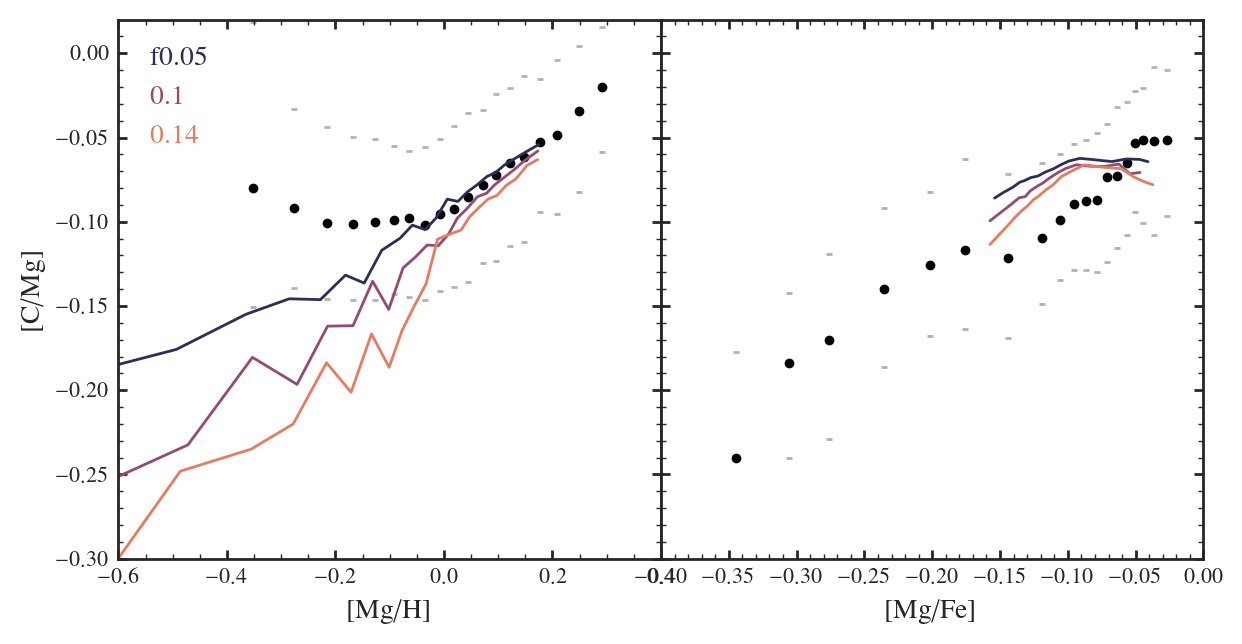

In [14]:
names = [    
    "C11_f0.1",
    "C11_f0.2",
    "C11_f0.3",
  ]

labels = ["f0.05", "0.1", "0.14", "f0.2", "0.25", "0.3", "f0.4", "f0.6"]
compare(names, labels, sequential=True)

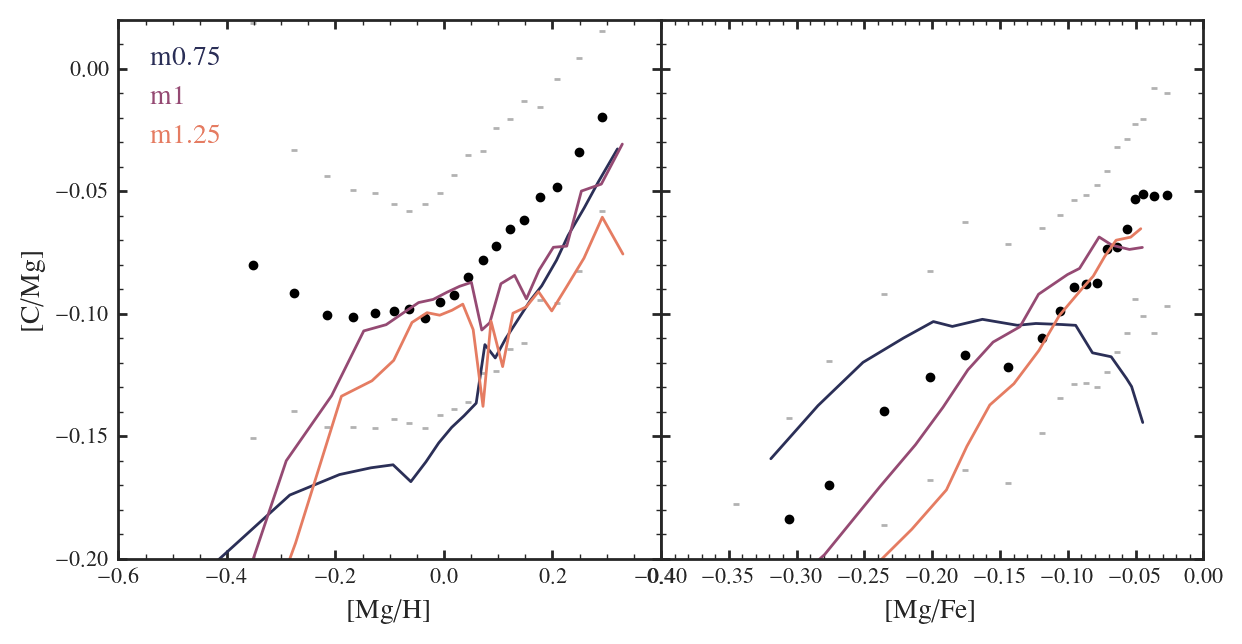

In [14]:
names = [    
    "C11_m0.75_P_f0.2_rand_walk",
        "C11_m1.25_P_f0.2_rand_walk",
    "C11_m1.5_P_f0.2_rand_walk",
]

labels = ["m0.75", 
         "m1", 
         "m1.25", "A"]
compare(names, labels, sequential=True)

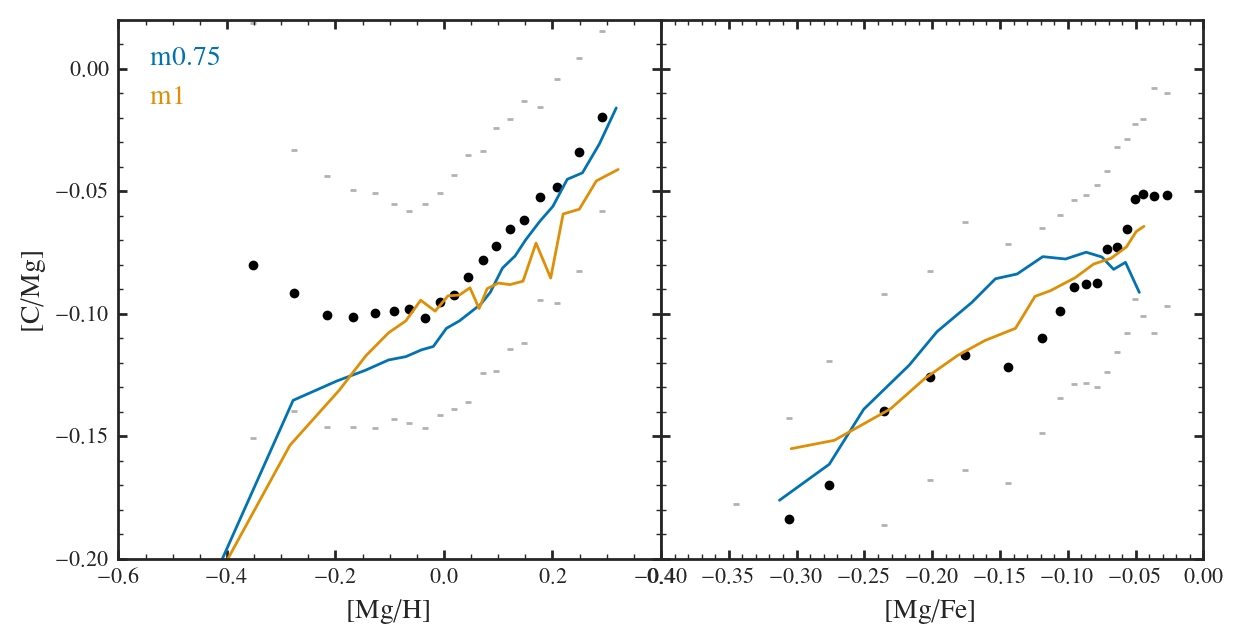

In [8]:
names = [    
    "C11_f0.2_rand_walk",
    "C11_m1.5_P_f0.1_rand_walk",
]

labels = ["m0.75", 
         "m1", 
         "m1.25", "A"]
compare(names, labels, sequential=False)

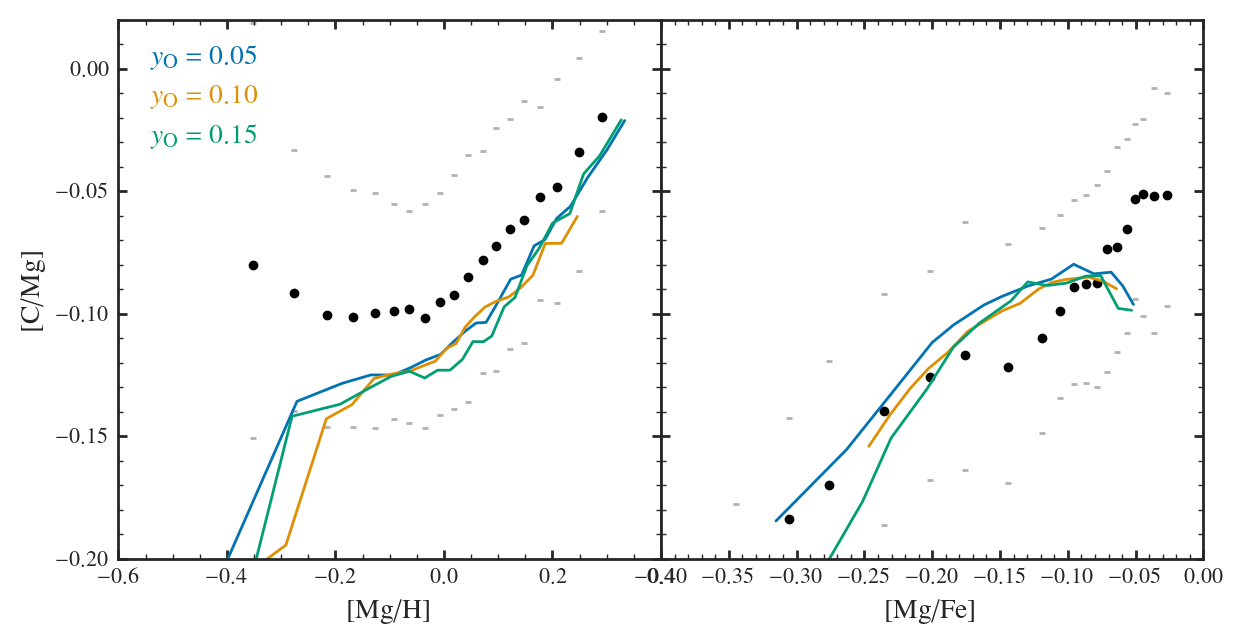

In [17]:
names = [    
    "C11_f0.2_rand_walk",
    "C11_f0.2_eta0.5_rand_walk",
    "C11_f0.3_rand_walk_Fe1.2",
]

labels = [r"$y_{\rm O}=0.05$", 
          r"$y_{\rm O}=0.10$", 
          r"$y_{\rm O}=0.15$"]
compare(names, labels)

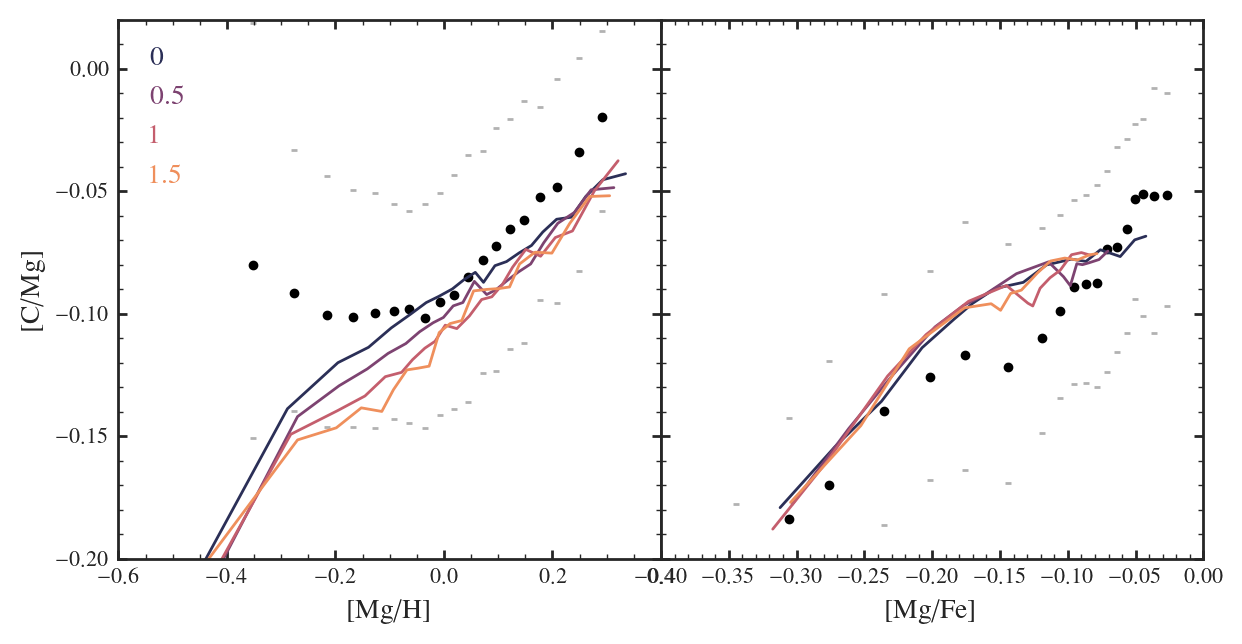

In [12]:
names = [    
    "A_f0.2_rand_walk",
    "A_f0.2_lateburst0.5_rand_walk",
    "A_f0.2_lateburst1_rand_walk",
    "A_f0.2_lateburst1.5_rand_walk",
]

labels = ["0", "0.5", "1", "1.5"]
compare(names, labels, sequential=True)

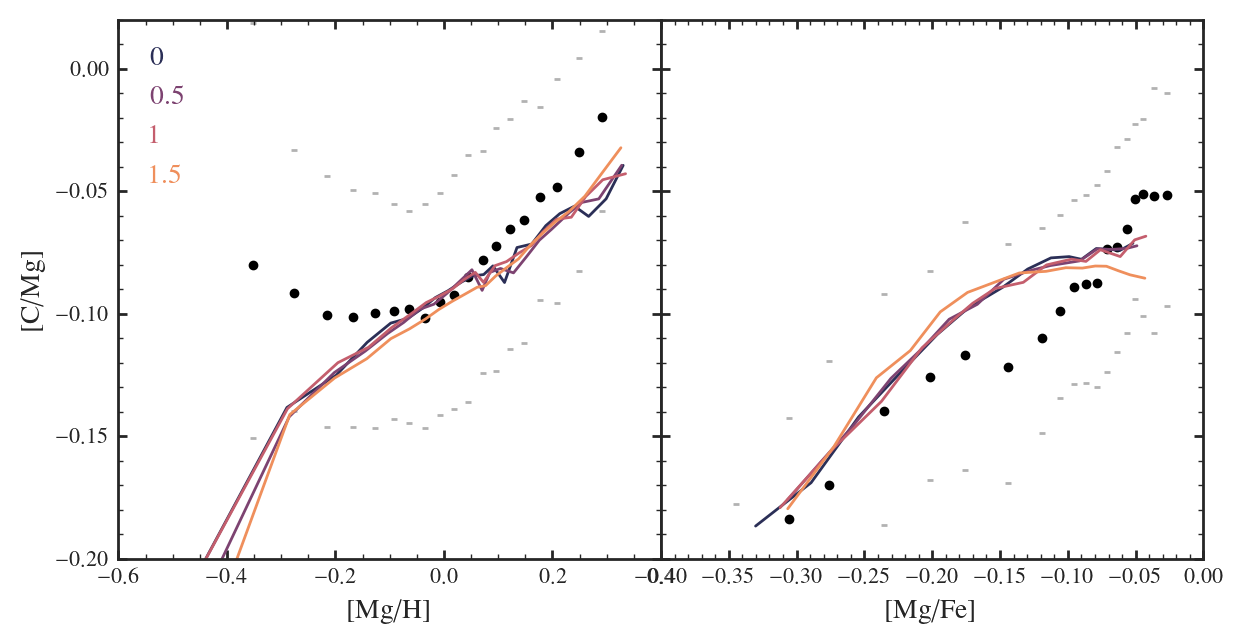

In [8]:
names = [    
    "A_z0_f0.2_rand_walk",
    "A_z-0.01_f0.2_rand_walk",
    "A_f0.2_rand_walk",
    "A_z-0.06_f0.2_rand_walk",
    "A_z-0.1_f0.2_rand_walk"
]

labels = ["0", "0.5", "1", "1.5"]
compare(names, labels, sequential=True)

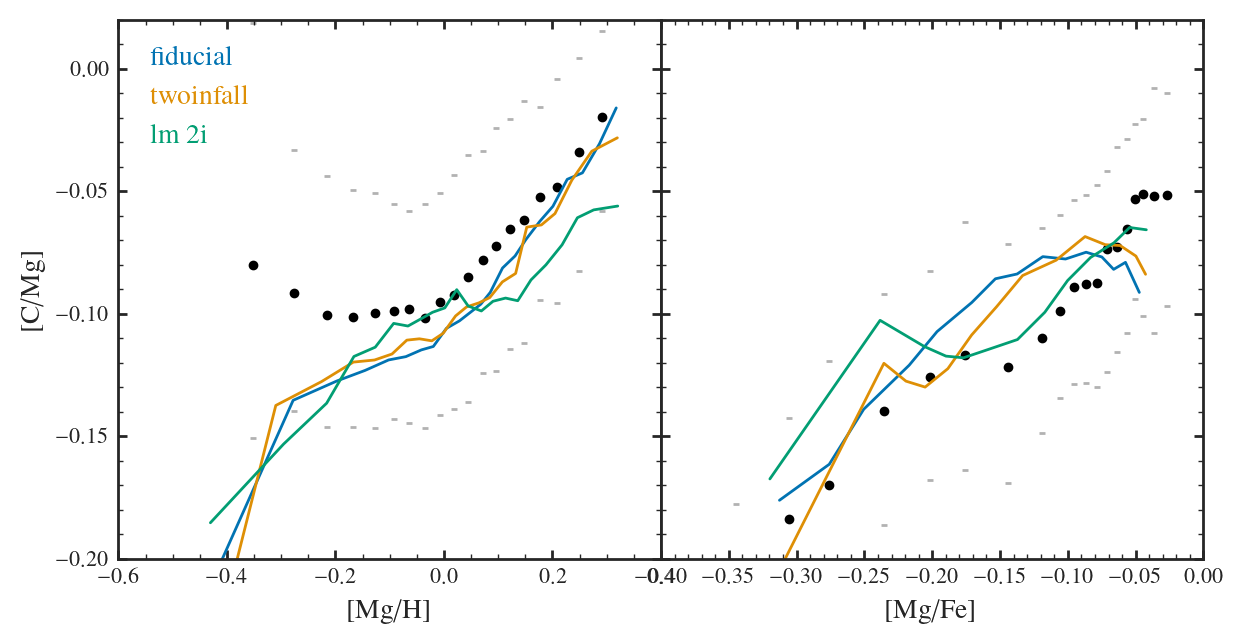

In [11]:
names = [    
    "C11_f0.2_rand_walk",
    "C11_f0.2_twoinfall1_rand_walk",
    "C11_m1.5_f0.1_twoinfall1_rand_walk",
]

labels = ["fiducial", "twoinfall", "lm 2i"]
compare(names, labels, sequential=False)

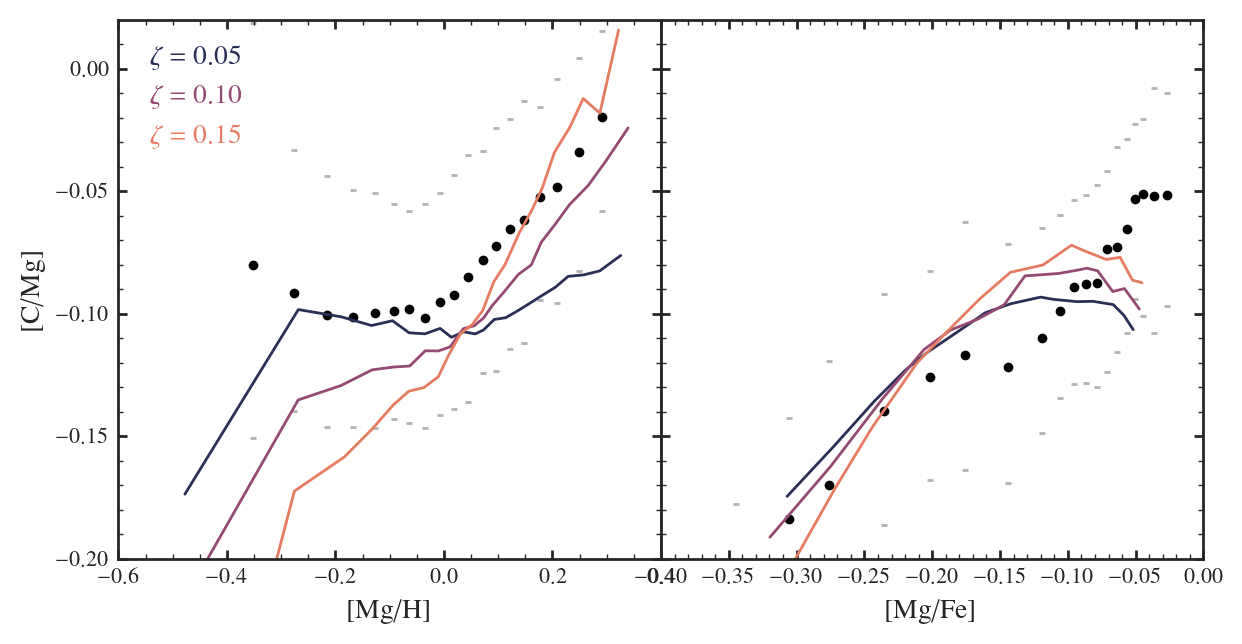

In [19]:
names = [
    "C11_f0.2_zeta0.05_rand_walk",
    "C11_f0.2_zeta0.1_rand_walk",
    "C11_f0.2_zeta0.15_rand_walk",
]

labels = [r"$\zeta=0.05$", r"$\zeta=0.10$", r"$\zeta=0.15$"]
compare(names, labels, sequential=True)

(-0.4, 0.02)

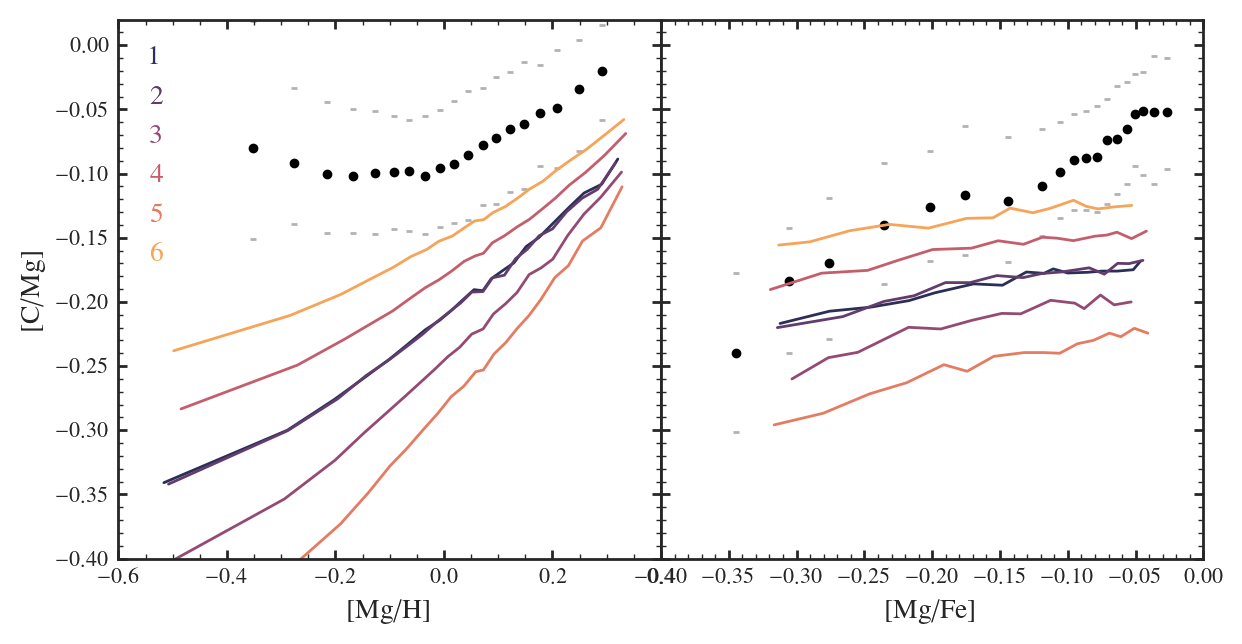

In [22]:
names = [
"C11_P_f0.2_rand_walk",
"C11_f0.2_rand_walk",
    "C11_m1.2_P_f0.25_rand_walk",
        "C11_m0.8_P_f0.15_rand_walk",
    "C11_f0.3_rand_walk_Fe1.2",
    "C11_f0.1_rand_walk_Fe0.8",

        ]

labels = ["1", "2", "3", "4", "5", "6"]
compare(names, labels, sequential=True)
plt.ylim(-0.4)

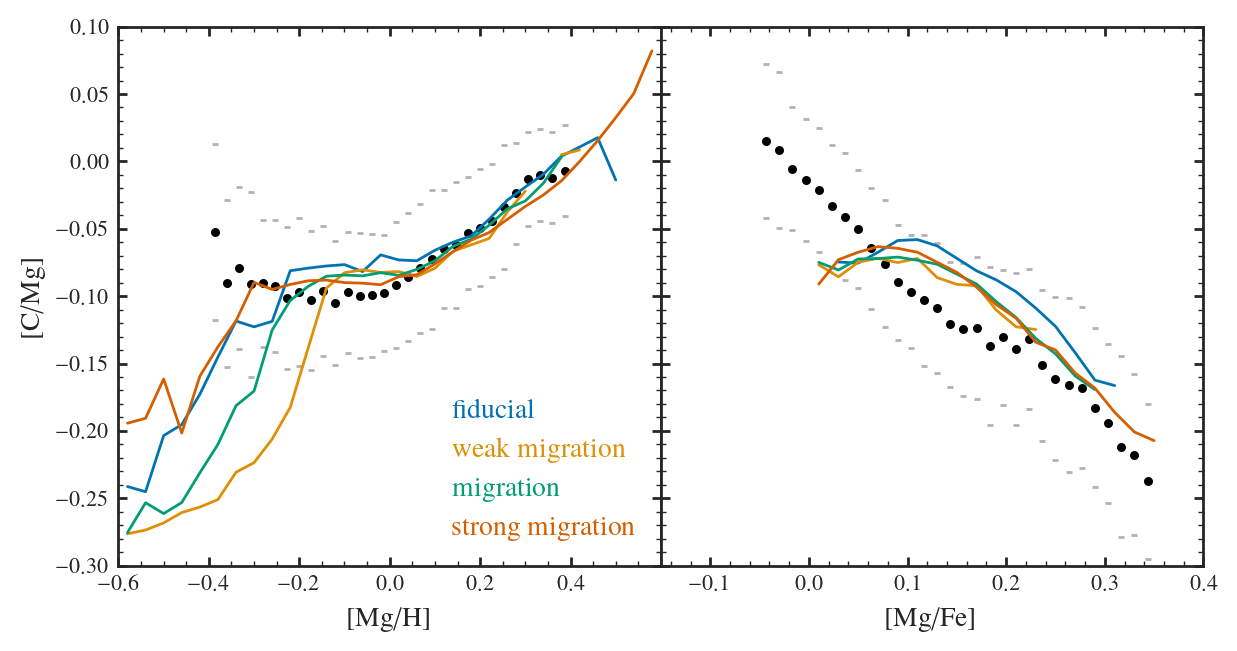

In [11]:
names = ["C11_f0.2_eta1_beta0.001", "C11_f0.2_beta0.001_rand_walk0.05_dt0.05", "C11_f0.2_beta0.001_rand_walk0.5_dt0.05", "C11_f0.2_beta0.001_rand_walk1.27_dt0.05"]

labels = ["fiducial", "weak migration", "migration", "strong migration"]
compare(names, labels, filename="migration_models.pdf")

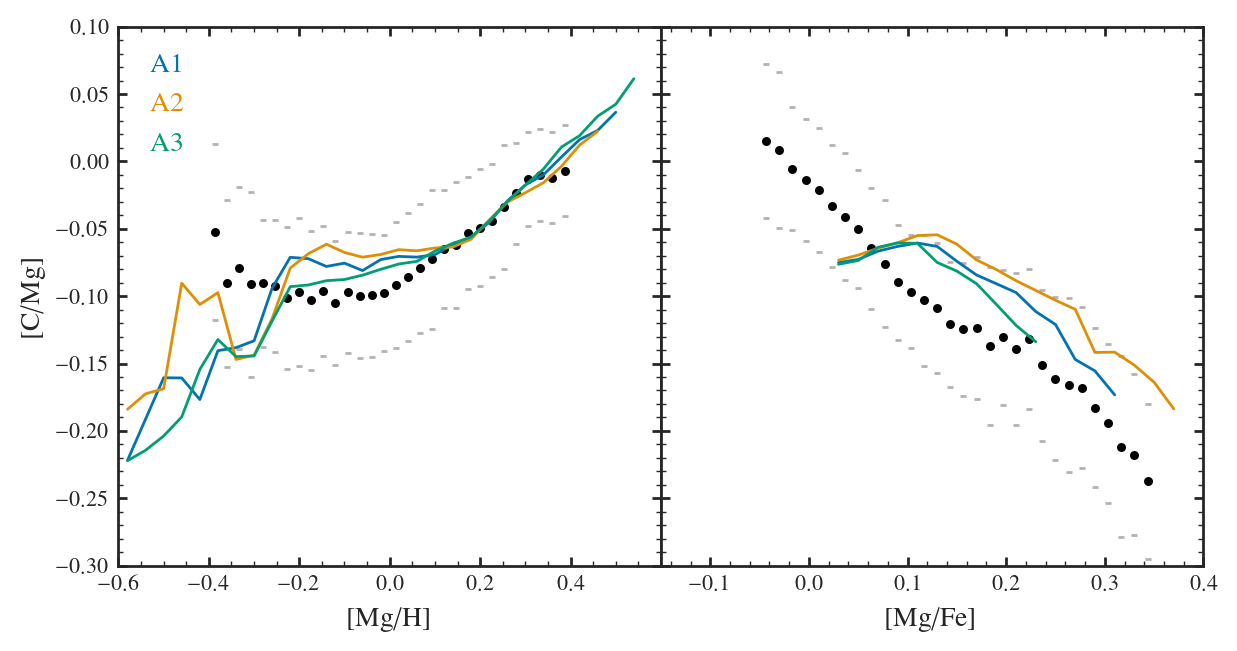

In [12]:
names = [
    "C11_f0.2_beta0.001",
    "C11_f0.24_beta0.001_Fe1.2",
    "C11_f0.16_beta0.001_Fe0.8",
]
compare(names, labels)

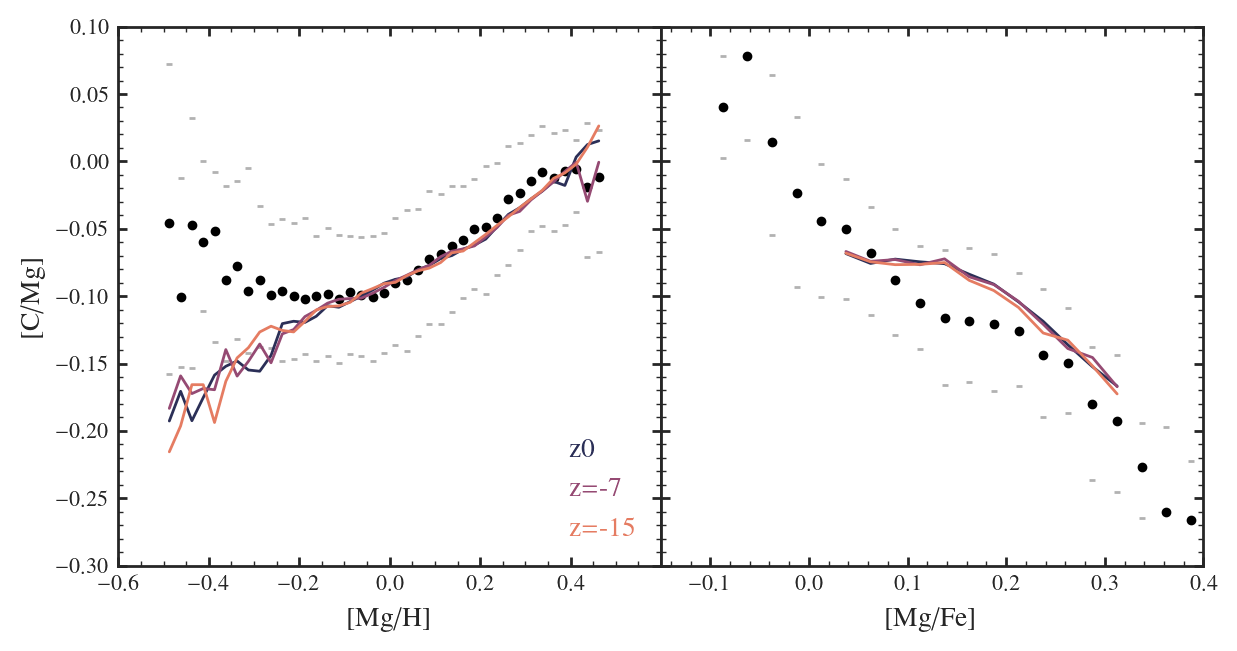

In [10]:
names = [
"A_2_3_4_z-0.02_f0.2_j8",
"A_4_5_6_z-0.02_f0.2_j8",
"A_1_1.5_2_z-0.02_f0.2_j8",
        ]

labels = ["z0", "z=-7", "z=-15", "A4", "A5"]
compare(names, labels, sequential=True)


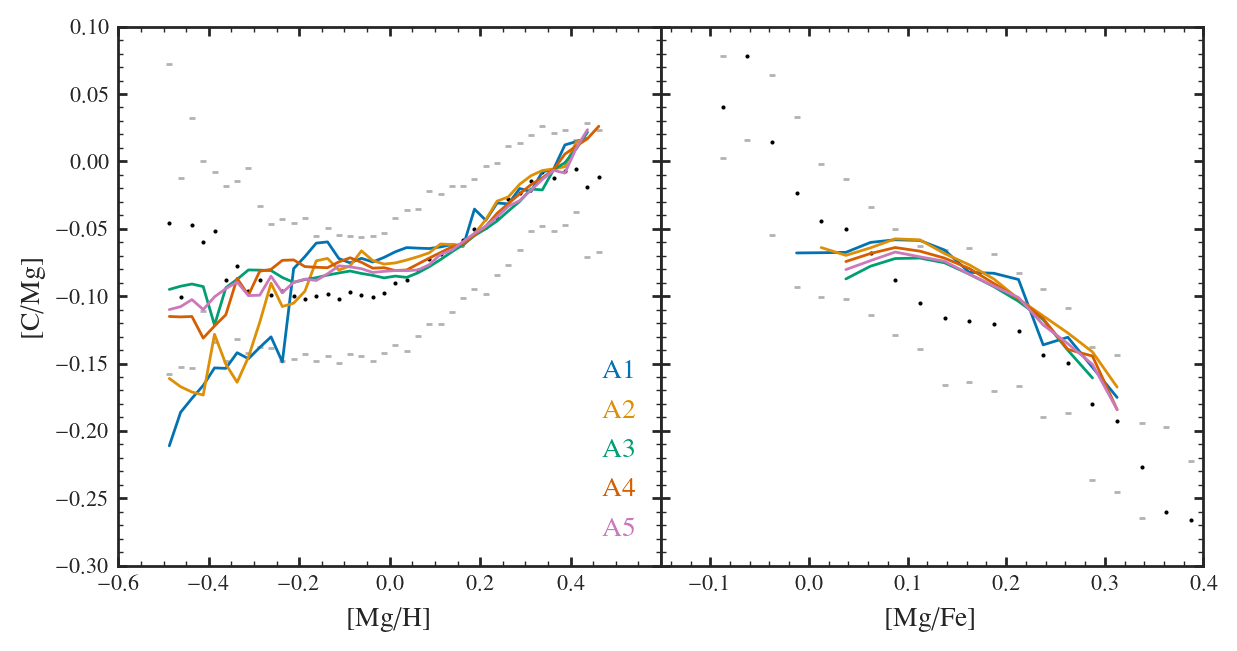

In [11]:
names = [
"C11_f0.2_beta0.001_dt0.1",
"C11_f0.2_beta0.001_dt0.02",
"C11_f0.2_beta0.001_post-process",
"C11_f0.2_beta0.001_linear",
"C11_f0.2_beta0.001_sudden",
        ]

labels = ["A1", "A2", "A3", "A4", "A5"]
compare(names, labels)

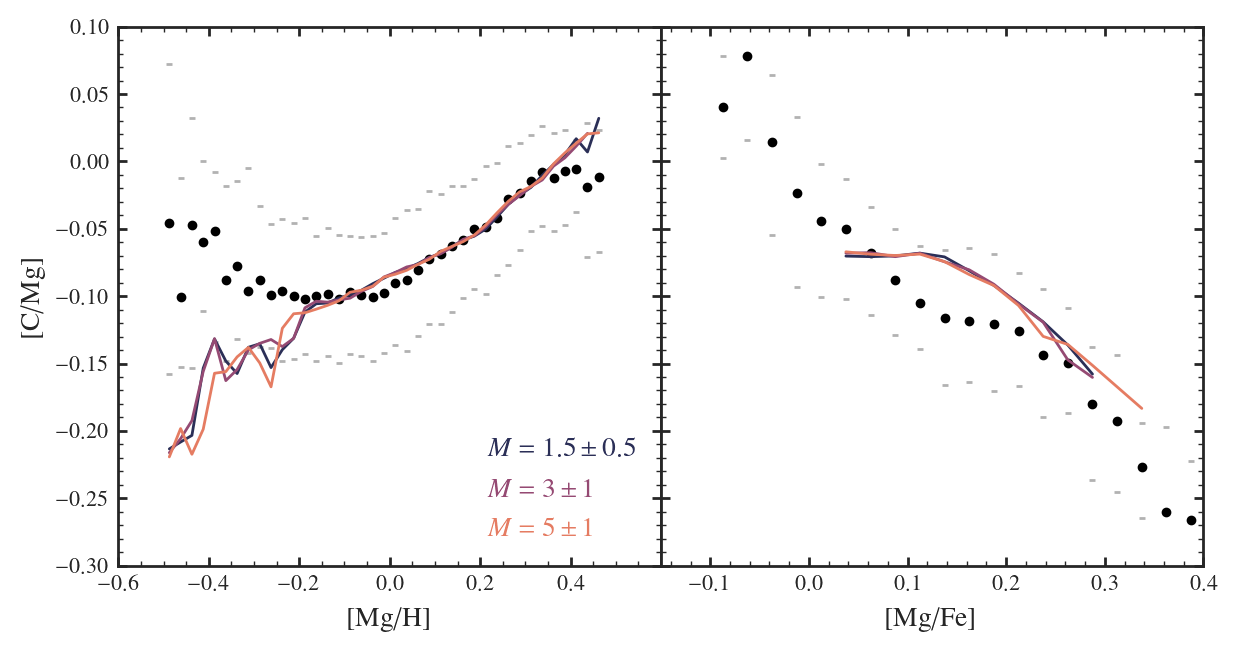

In [11]:
names = [
"A_4_5_6_z-0.02_f0.2_j8",
"A_1_1.5_2_z-0.02_f0.2_j8",
"A_1.3_2.3_4.3_z-0.02_f0.2_j8",
        ]
labels = [          
    r"$M = 1.5\pm0.5$", 
          r"$M=3\pm1$", 
          r"$M=5\pm1$"]
compare(names, labels, sequential=True, filename="agb_mass.pdf")

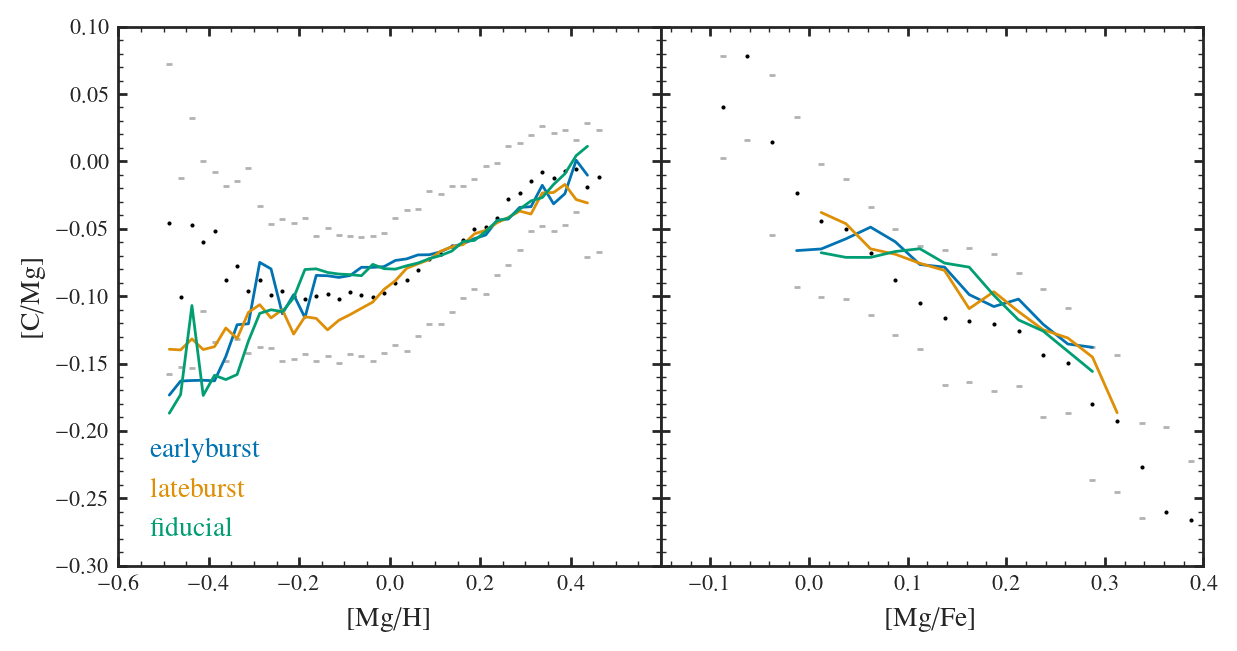

In [39]:
names = [
"A_1.3_2.3_4.3_z-0.0007_f0.2_beta0.001_twoexp0.5_dt0.05",
"A_1.3_2.3_4.3_z-0.0007_f0.2_beta0.001_lateburst1.5_dt0.05",
"A_1.3_2.3_4.3_z-0.0007_f0.2_beta0.001_dt0.05",
]
labels = ["earlyburst", "lateburst", "fiducial", "A4", "A5"]
compare(names, labels)

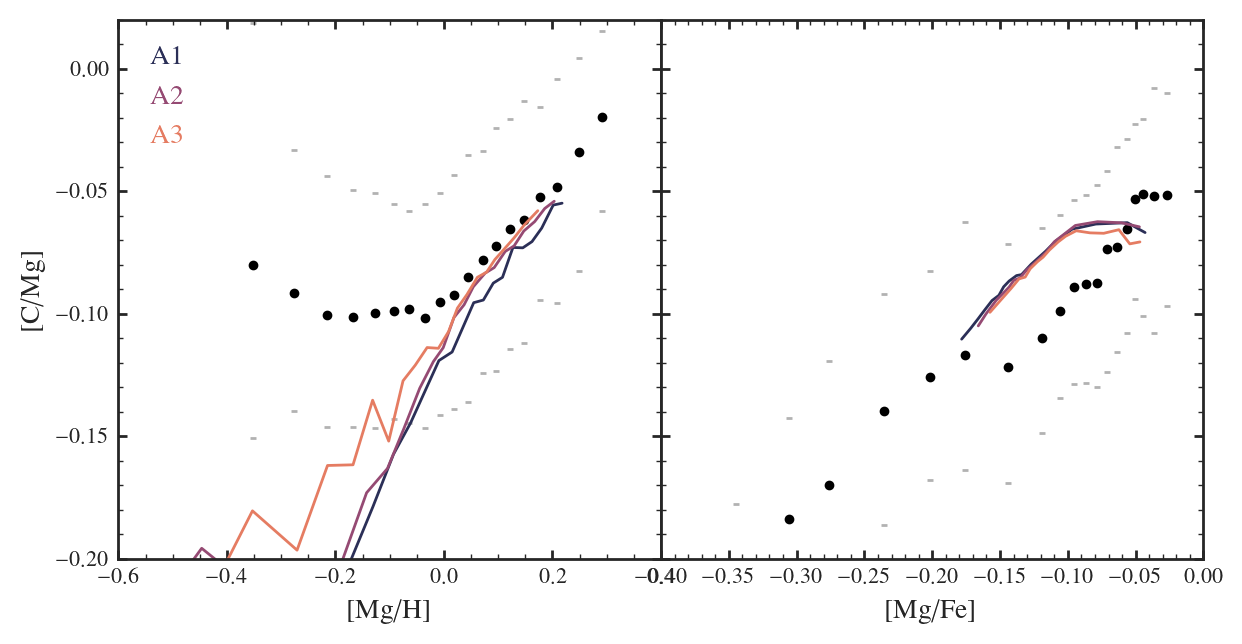

In [25]:
names = [
"C11_f0.2sigma_3.0",
    "C11_f0.22.0",
    "C11_f0.2"
]

labels = ["A1", "A2", "A3", "A4", "A5"]
compare(names, labels, sequential=True)

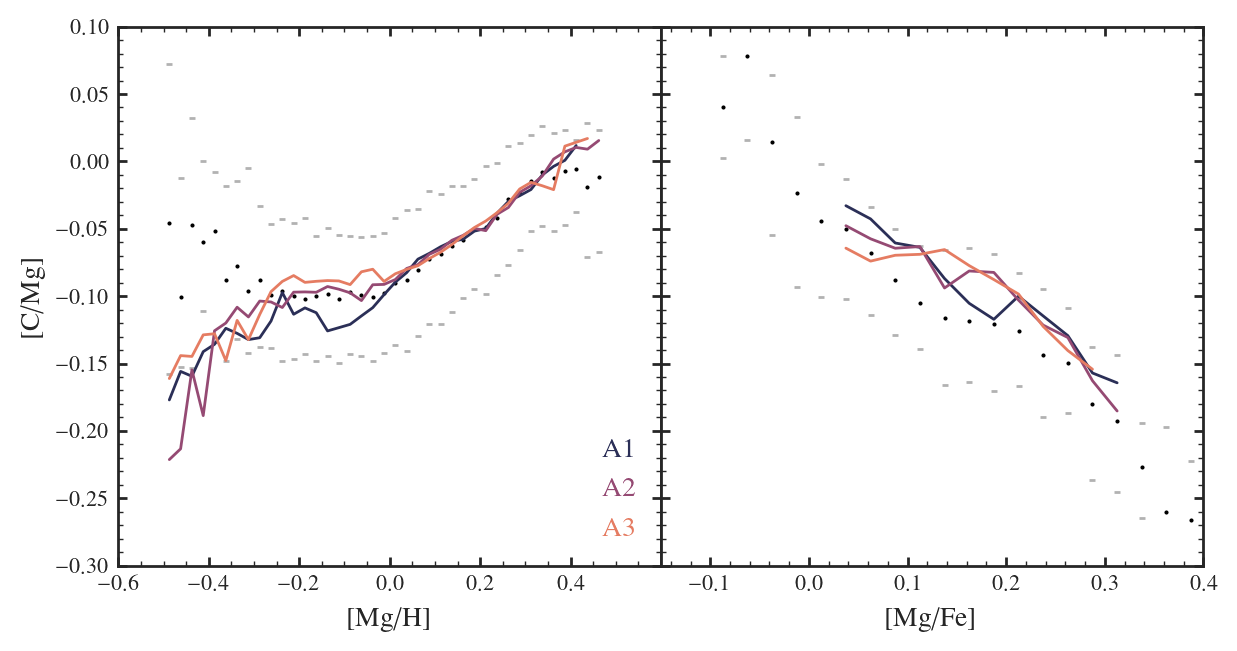

In [12]:
names = [
"C11_f0.2_beta0.001_lateburst2.0",
"C11_f0.2_beta0.001_lateburst1.0",
"C11_f0.2_beta0.001_lateburst0.5",
]

labels = ["A1", "A2", "A3", "A4", "A5"]
compare(names, labels, sequential=True)

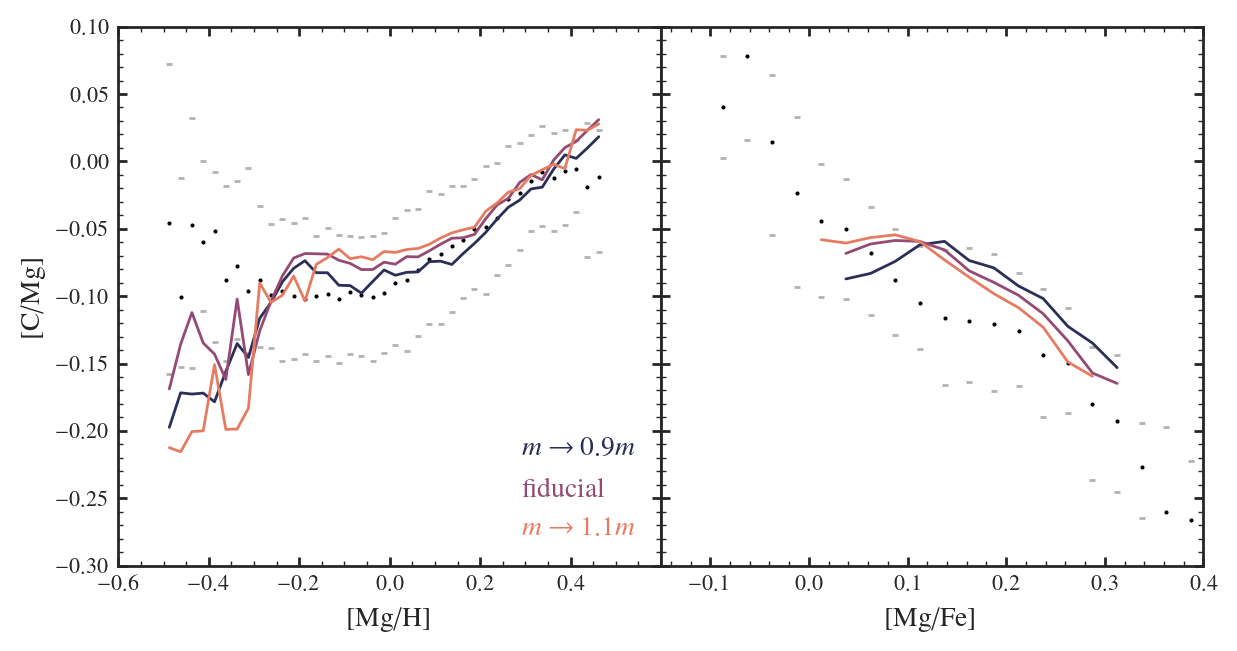

In [10]:
names = [
"C11_m0.9_f0.2_beta0.001_nthreads8",
"C11_f0.2_beta0.001_nthreads8",
"C11_m1.1_f0.2_beta0.001_nthreads8",
]

labels = [r"$m\to0.9m$", "fiducial", r"$m\to1.1m$", "A4", "A5"]
compare(names, labels, sequential=True, filename="shift_mass.pdf")

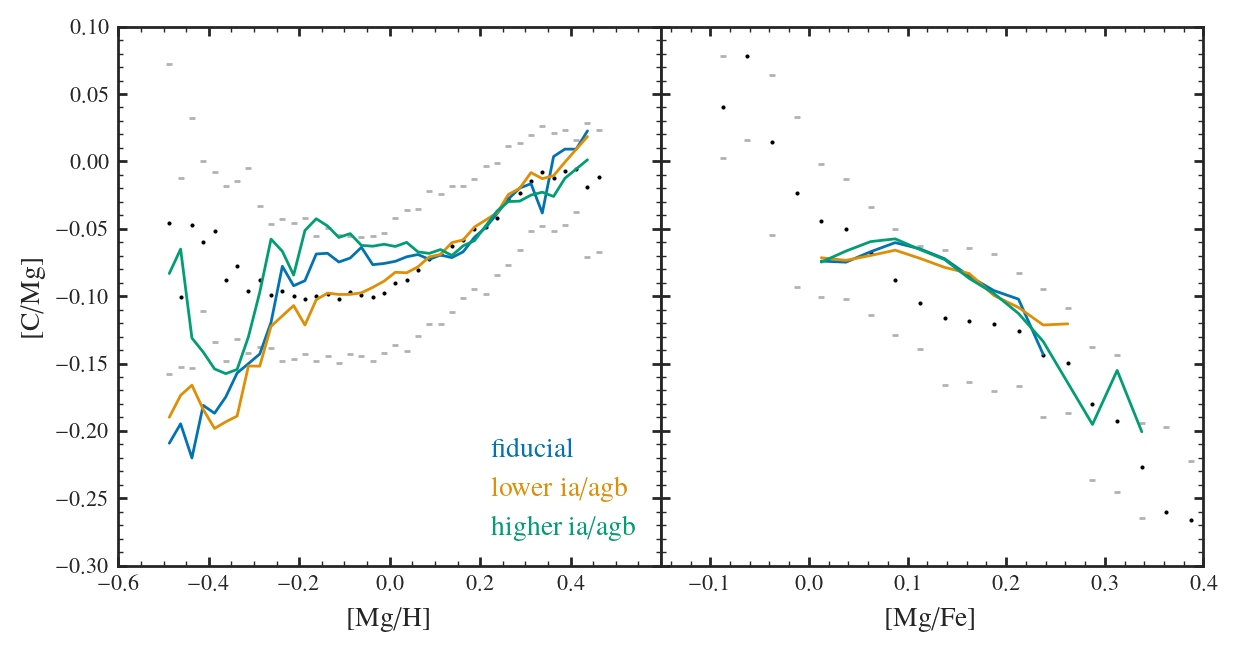

In [11]:
names = ["C11_f0.2_beta0.001_dt0.05",
"C11_f0.1_beta0.001_Fe0.9_dt0.05",
"C11_f0.3_beta0.001_Fe1.1_dt0.05",]

labels = [r"fiducial",
         "lower ia/agb",
         r"higher ia/agb"]
models = {label: find_model(name) for name, label in zip(names, labels)}
compare(names, labels, filename="ia_agb_degeneracy.pdf")